In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
seeds = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/2017%20March%20ML%20Mania%20Predictions/TourneySeeds.csv")
seeds.head(3)

,Season,Seed,Team
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228


In [3]:
games = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/2017%20March%20ML%20Mania%20Predictions/TourneyCompactResults.csv")
games.head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0


In [4]:
allgames = games.merge(seeds, how='inner', left_on=['Wteam', 'Season'], right_on=['Team', 'Season'])
allgames.head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed,Team
0,1985,136,1116,63,1234,54,N,0,X09,1116
1,1985,136,1120,59,1345,58,N,0,Z11,1120
2,1985,138,1120,66,1242,64,N,0,Z11,1120


In [5]:
allgames = allgames.merge(seeds, how='inner', left_on=['Lteam', 'Season'], right_on=['Team', 'Season'])
allgames.head(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345
2,1985,138,1120,66,1242,64,N,0,Z11,1120,Z03,1242


In [6]:
allgames['Winning Seed'] = allgames['Seed_x'].str[1:]
allgames['Losing Seed'] = allgames['Seed_y'].str[1:]
allgames.tail(3)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed
2047,2016,137,1458,47,1338,43,N,0,W07,1458,W10,1338,07,10
2048,2016,139,1458,66,1462,63,N,0,W07,1458,W02,1462,07,02
2049,2016,137,1462,71,1451,53,N,0,W02,1462,W15,1451,02,15


In [7]:
def change(ch):
    if len(ch) > 2:
        return ch[:2]
    else:
        return ch


allgames['Winner'] = allgames['Winning Seed'].apply(change)
allgames['Loser'] = allgames['Losing Seed'].apply(change)
allgames['Winner'].sort_values().tail(30)

403     15
1767    15
1772    15
1021    15
1829    15
1828    15
795     15
2020    15
1328    16
1584    16
1920    16
1851    16
1849    16
1649    16
1072    16
1650    16
1719    16
1520    16
1392    16
1983    16
1916    16
1986    16
1456    16
1136    16
1784    16
1782    16
1264    16
1008    16
1200    16
1716    16
Name: Winner, dtype: object

In [8]:
allgames['Winner'] =  allgames['Winner'].astype('int')
allgames['Loser'] =  allgames['Loser'].astype('int')

allgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        2050 non-null   int64 
 1   Daynum        2050 non-null   int64 
 2   Wteam         2050 non-null   int64 
 3   Wscore        2050 non-null   int64 
 4   Lteam         2050 non-null   int64 
 5   Lscore        2050 non-null   int64 
 6   Wloc          2050 non-null   object
 7   Numot         2050 non-null   int64 
 8   Seed_x        2050 non-null   object
 9   Team_x        2050 non-null   int64 
 10  Seed_y        2050 non-null   object
 11  Team_y        2050 non-null   int64 
 12  Winning Seed  2050 non-null   object
 13  Losing Seed   2050 non-null   object
 14  Winner        2050 non-null   int64 
 15  Loser         2050 non-null   int64 
dtypes: int64(11), object(5)
memory usage: 272.3+ KB


In [9]:
allgames.groupby('Winner')['Wteam'].count()

Winner
1     429
2     307
3     230
4     198
5     142
6     144
7     114
8      93
9      72
10     82
11     81
12     70
13     33
14     24
15      9
16     22
Name: Wteam, dtype: int64

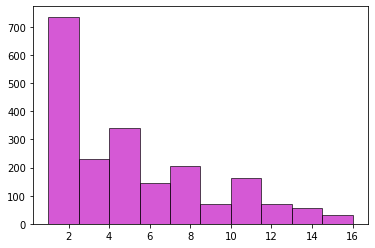

In [10]:
plt.hist(allgames['Winner'], color='m', alpha=0.65, edgecolor='black')

plt.style.use('ggplot')

In [11]:
allgames['game number'] = allgames.groupby(['Season', 'Winner'])['Winner'].transform('rank')
allgames[allgames['Winner'] == 16].head(10)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number
1008,2001,134,1322,71,1457,67,N,0,Y16a,1322,Y16b,1457,16a,16b,16,16,1.0
1072,2002,134,1373,81,1108,77,N,0,W16b,1373,W16a,1108,16b,16a,16,16,1.0
1136,2003,134,1421,92,1411,84,N,1,X16b,1421,X16a,1411,16b,16a,16,16,1.0
1200,2004,134,1197,72,1250,57,N,0,Z16a,1197,Z16b,1250,16a,16b,16,16,1.0
1264,2005,134,1324,79,1105,69,N,0,Z16b,1324,Z16a,1105,16b,16a,16,16,1.0
1328,2006,134,1284,71,1214,49,N,0,Y16b,1284,Y16a,1214,16b,16a,16,16,1.0
1392,2007,134,1310,77,1197,69,N,0,Z16b,1310,Z16a,1197,16b,16a,16,16,1.0
1456,2008,134,1291,69,1164,60,N,0,W16b,1291,W16a,1164,16b,16a,16,16,1.0
1520,2009,134,1287,58,1106,43,N,0,Y16b,1287,Y16a,1106,16b,16a,16,16,1.0
1584,2010,134,1115,61,1457,44,N,0,X16a,1115,X16b,1457,16a,16b,16,16,1.0


In [12]:
allgames = allgames[(allgames['Winner'] != 16) & (allgames['Loser'] != 16)]
allgames['game number'] = allgames.sort_values(['Season', 'Daynum']).groupby(['Season']).cumcount()+1
allgames.sort_values(['Season', 'Daynum']).head(70)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234,09,08,9,8,1
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345,11,06,11,6,2
8,1985,136,1229,58,1425,55,N,0,Y09,1229,Y08,1425,09,08,9,8,3
9,1985,136,1242,49,1325,38,N,0,Z03,1242,Z14,1325,03,14,3,14,4
10,1985,136,1246,66,1449,58,N,0,X12,1246,X05,1449,12,05,12,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1986,136,1272,95,1123,63,N,0,Y03,1272,Y14,1123,03,14,3,14,7
89,1986,136,1277,72,1449,70,N,0,X05,1277,X12,1449,05,12,5,12,8
91,1986,136,1314,84,1428,72,N,0,Z03,1314,Z14,1428,03,14,3,14,9
93,1986,136,1328,80,1318,74,N,0,W04,1328,W13,1318,04,13,4,13,10


In [13]:
def rounds(g):
    if g <= 32:
        return 1
    elif g <= 48:
        return 2
    elif g <= 56:
        return 3
    elif g <= 60:
        return 4
    else:
        return 5
allgames['Round'] = allgames['game number'].apply(rounds)
allgames.head(10)

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number,Round
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234,09,08,9,8,1,1
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345,11,06,11,6,2,1
2,1985,138,1120,66,1242,64,N,0,Z11,1120,Z03,1242,11,03,11,3,29,1
4,1985,138,1207,63,1396,46,N,0,W01,1207,W08,1396,01,08,1,8,30,1
5,1985,143,1207,65,1260,53,N,0,W01,1207,W04,1260,01,04,1,4,45,2
6,1985,145,1207,60,1210,54,N,0,W01,1207,W02,1210,01,02,1,2,53,3
7,1985,152,1207,77,1385,59,N,0,W01,1207,X01,1385,01,01,1,1,57,4
8,1985,136,1229,58,1425,55,N,0,Y09,1229,Y08,1425,09,08,9,8,3,1
9,1985,136,1242,49,1325,38,N,0,Z03,1242,Z14,1325,03,14,3,14,4,1
10,1985,136,1246,66,1449,58,N,0,X12,1246,X05,1449,12,05,12,5,5,1


In [14]:
wrounds = allgames.groupby(['Round', 'Winner']).agg({'Wteam' : 'count'})
wrounds.reset_index(inplace=True)
wrounds.head(20)

,Round,Winner,Wteam
0,1,1,33
1,1,2,142
2,1,3,120
3,1,4,115
4,1,5,94
5,1,6,87
6,1,7,80
7,1,8,67
8,1,9,64
9,1,10,55


In [15]:
lrounds = allgames.groupby(['Round', 'Loser']).agg({'Lteam' : 'count'})
lrounds.reset_index(inplace=True)
lrounds.head()

,Round,Loser,Lteam
0,1,1,3
1,1,2,14
2,1,3,27
3,1,4,37
4,1,5,53


In [16]:
wincounts = pd.merge(wrounds, lrounds, how='outer', left_on=['Round', 'Winner'], right_on=['Round', 'Loser'])
wincounts.head(20)

,Round,Winner,Wteam,Loser,Lteam
0,1,1.0,33.0,1.0,3.0
1,1,2.0,142.0,2.0,14.0
2,1,3.0,120.0,3.0,27.0
3,1,4.0,115.0,4.0,37.0
4,1,5.0,94.0,5.0,53.0
5,1,6.0,87.0,6.0,50.0
6,1,7.0,80.0,7.0,66.0
7,1,8.0,67.0,8.0,77.0
8,1,9.0,64.0,9.0,84.0
9,1,10.0,55.0,10.0,84.0


In [17]:
wincounts['Lteam'] = wincounts['Lteam'].fillna(value = 0)
wincounts['games'] = wincounts['Wteam'] + wincounts['Lteam']
wincounts.head(20)

,Round,Winner,Wteam,Loser,Lteam,games
0,1,1.0,33.0,1.0,3.0,36.0
1,1,2.0,142.0,2.0,14.0,156.0
2,1,3.0,120.0,3.0,27.0,147.0
3,1,4.0,115.0,4.0,37.0,152.0
4,1,5.0,94.0,5.0,53.0,147.0
5,1,6.0,87.0,6.0,50.0,137.0
6,1,7.0,80.0,7.0,66.0,146.0
7,1,8.0,67.0,8.0,77.0,144.0
8,1,9.0,64.0,9.0,84.0,148.0
9,1,10.0,55.0,10.0,84.0,139.0


In [18]:
wincounts['Win Percentage'] = wincounts['Wteam'] / wincounts['games'] 
wincounts.head(20)

,Round,Winner,Wteam,Loser,Lteam,games,Win Percentage
0,1,1.0,33.0,1.0,3.0,36.0,0.916667
1,1,2.0,142.0,2.0,14.0,156.0,0.910256
2,1,3.0,120.0,3.0,27.0,147.0,0.816327
3,1,4.0,115.0,4.0,37.0,152.0,0.756579
4,1,5.0,94.0,5.0,53.0,147.0,0.639456
5,1,6.0,87.0,6.0,50.0,137.0,0.635036
6,1,7.0,80.0,7.0,66.0,146.0,0.547945
7,1,8.0,67.0,8.0,77.0,144.0,0.465278
8,1,9.0,64.0,9.0,84.0,148.0,0.432432
9,1,10.0,55.0,10.0,84.0,139.0,0.395683


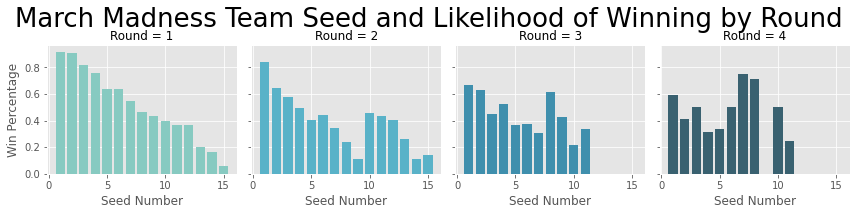

In [19]:
wincounts['Seed Number'] = wincounts['Winner']
wincounts = wincounts[wincounts['Round'] != 5]
g = sns.FacetGrid(wincounts, col='Round', hue='Round', palette = 'GnBu_d')

g = g.map(plt.bar, 'Seed Number', "Win Percentage")

plt.subplots_adjust(top=0.8)
g.fig.suptitle('March Madness Team Seed and Likelihood of Winning by Round', fontsize=26) 
plt.savefig("March Madness Rounds.png")

In [20]:
allgames['Difference'] = allgames['Winner'] - allgames['Loser']

def upse(diff):
    if diff > 2:
        return 1
    else:
        return 0

allgames['Upset'] =  allgames['Difference'].apply(upse)
allgames.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,Seed_y,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number,Round,Difference,Upset
0,1985,136,1116,63,1234,54,N,0,X09,1116,X08,1234,09,08,9,8,1,1,1,0
1,1985,136,1120,59,1345,58,N,0,Z11,1120,Z06,1345,11,06,11,6,2,1,5,1
2,1985,138,1120,66,1242,64,N,0,Z11,1120,Z03,1242,11,03,11,3,29,1,8,1
4,1985,138,1207,63,1396,46,N,0,W01,1207,W08,1396,01,08,1,8,30,1,-7,0
5,1985,143,1207,65,1260,53,N,0,W01,1207,W04,1260,01,04,1,4,45,2,-3,0


In [21]:
allgames['Matchup'] = allgames[['Winner', 'Loser']].min(axis=1).astype(str)  + 'vs' + allgames[['Winner', 'Loser']].max(axis=1).astype(str)
allgames.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Seed_x,Team_x,...,Team_y,Winning Seed,Losing Seed,Winner,Loser,game number,Round,Difference,Upset,Matchup
0,1985,136,1116,63,1234,54,N,0,X09,1116,...,1234,09,08,9,8,1,1,1,0,8vs9
1,1985,136,1120,59,1345,58,N,0,Z11,1120,...,1345,11,06,11,6,2,1,5,1,6vs11
2,1985,138,1120,66,1242,64,N,0,Z11,1120,...,1242,11,03,11,3,29,1,8,1,3vs11
4,1985,138,1207,63,1396,46,N,0,W01,1207,...,1396,01,08,1,8,30,1,-7,0,1vs8
5,1985,143,1207,65,1260,53,N,0,W01,1207,...,1260,01,04,1,4,45,2,-3,0,1vs4


In [22]:
upsetdfsum = allgames.groupby(['Matchup']).agg({"Upset" : "sum"}).reset_index()
upsetdfsum.head()

,Matchup,Upset
0,10vs11,0
1,10vs14,0
2,10vs15,0
3,11vs11,0
4,11vs14,0


In [23]:
upsetdfcount = allgames.groupby(['Matchup']).agg({"Upset" : "count"}).reset_index()
upsetdfcount.head()

,Matchup,Upset
0,10vs11,3
1,10vs14,1
2,10vs15,5
3,11vs11,7
4,11vs14,5


In [24]:
upsetdf = pd.merge(upsetdfcount, upsetdfsum, how='inner', on='Matchup')
upsetdf.tail()

,Matchup,Upset_x,Upset_y
71,8vs11,1,0
72,8vs12,1,1
73,8vs13,1,0
74,8vs9,128,0
75,9vs13,1,0


In [25]:
upsetdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Matchup  76 non-null     object
 1   Upset_x  76 non-null     int64 
 2   Upset_y  76 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [26]:
upsetdf = upsetdf[upsetdf['Upset_y'] != 0]
upsetdf['Upset Percentage'] = upsetdf['Upset_y'] / upsetdf['Upset_x']
upsetdf

,Matchup,Upset_x,Upset_y,Upset Percentage
10,1vs10,6,1,0.166667
11,1vs11,6,3,0.500000
16,1vs4,58,17,0.293103
17,1vs5,43,7,0.162791
18,1vs6,11,3,0.272727
19,1vs7,6,1,0.166667
20,1vs8,66,13,0.196970
21,1vs9,65,5,0.076923
22,2vs10,45,18,0.400000
23,2vs11,14,1,0.071429


In [27]:
upsetdf.rename(columns={'Upset_x': 'Number of Occurances'}, inplace=True)
upsetdf.drop('Upset_y', axis=1, inplace=True)
upsetdf.head()

,Matchup,Number of Occurances,Upset Percentage
10,1vs10,6,0.166667
11,1vs11,6,0.500000
16,1vs4,58,0.293103
17,1vs5,43,0.162791
18,1vs6,11,0.272727
